In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
df = pd.read_csv('blink_rate_dataset.csv', encoding='windows-1252')

In [3]:
X = df[['Blink Rate (per min)']]
y = df['Parkinsons']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
y_pred = model.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
joblib.dump(model, 'blink_model.pkl')

Accuracy: 0.9000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.86      1.00      0.92        12

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20

Confusion Matrix:
 [[ 6  2]
 [ 0 12]]


['blink_model.pkl']

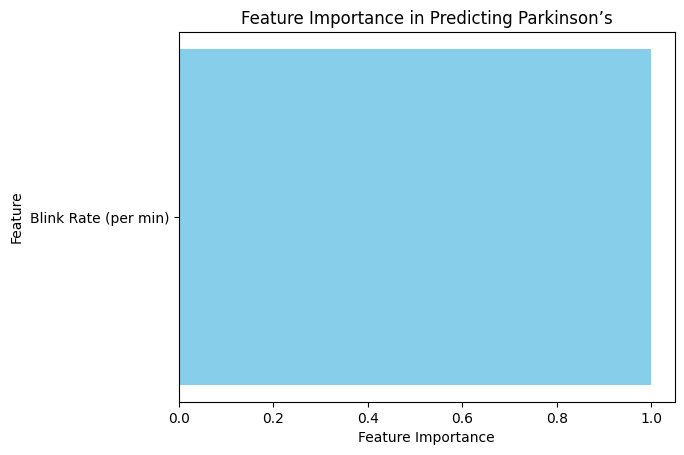

In [8]:
feature_importances = model.feature_importances_
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Parkinson’s')
plt.show()